# Counting words

In [1]:
from collections import Counter

In [2]:
text = "Quam ob rem cave Catoni anteponas ne istum quidem ipsum, quem Apollo, ut ais, sapientissimum iudicavit; huius enim facta, illius dicta laudantur. De me autem, ut iam cum utroque vestrum loquar, sic habetote."

In [3]:
def count_words(text):
    """ Documentation here"""
    word_counts = {}
    text = text.lower()
    skips = [".", ",", ";", ":", '"', "'"]
    
    for ch in skips:
        text = text.replace(ch,"")

    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts
        

In [4]:
count_words(text)

{'ais': 1,
 'anteponas': 1,
 'apollo': 1,
 'autem': 1,
 'catoni': 1,
 'cave': 1,
 'cum': 1,
 'de': 1,
 'dicta': 1,
 'enim': 1,
 'facta': 1,
 'habetote': 1,
 'huius': 1,
 'iam': 1,
 'illius': 1,
 'ipsum': 1,
 'istum': 1,
 'iudicavit': 1,
 'laudantur': 1,
 'loquar': 1,
 'me': 1,
 'ne': 1,
 'ob': 1,
 'quam': 1,
 'quem': 1,
 'quidem': 1,
 'rem': 1,
 'sapientissimum': 1,
 'sic': 1,
 'ut': 2,
 'utroque': 1,
 'vestrum': 1}

In [5]:
text.lower()

'quam ob rem cave catoni anteponas ne istum quidem ipsum, quem apollo, ut ais, sapientissimum iudicavit; huius enim facta, illius dicta laudantur. de me autem, ut iam cum utroque vestrum loquar, sic habetote.'

In [6]:
def count_words_fast(text):
    """ Documentation here"""
    word_counts = {}
    text = text.lower()
    skips = [".", ",", ";", ":", '"', "'"]
    
    for ch in skips:
        text = text.replace(ch,"")

    word_counts = Counter(text.split(" "))
    return word_counts

In [7]:
count_words_fast(text)

Counter({'ais': 1,
         'anteponas': 1,
         'apollo': 1,
         'autem': 1,
         'catoni': 1,
         'cave': 1,
         'cum': 1,
         'de': 1,
         'dicta': 1,
         'enim': 1,
         'facta': 1,
         'habetote': 1,
         'huius': 1,
         'iam': 1,
         'illius': 1,
         'ipsum': 1,
         'istum': 1,
         'iudicavit': 1,
         'laudantur': 1,
         'loquar': 1,
         'me': 1,
         'ne': 1,
         'ob': 1,
         'quam': 1,
         'quem': 1,
         'quidem': 1,
         'rem': 1,
         'sapientissimum': 1,
         'sic': 1,
         'ut': 2,
         'utroque': 1,
         'vestrum': 1})

In [8]:
count_words(text) == count_words_fast(text)

True

# Readin in a book

In [9]:
def read_book(title_path):
    """"Read a book and return a string"""
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [10]:
pwd

'/home/jovyan'

In [11]:
text = read_book("THE_KING_IN_YELLOW.txt")
len(text)

409340

In [12]:
ind = text.find("I will tell you")

In [13]:
simple_text = text[ind: ind+1000]
print(simple_text)

I will tell you. On your word as a soldier, promise me to read thismanuscript from beginning to end, without asking me a question. Promiseme to read these notes in the same way, and promise me to listen to whatI have to tell later.""I promise, if you wish it," he said pleasantly. "Give me the paper,Hildred."He began to read, raising his eyebrows with a puzzled, whimsical air,which made me tremble with suppressed anger. As he advanced his, eyebrowscontracted, and his lips seemed to form the word "rubbish."Then he looked slightly bored, but apparently for my sake read, with anattempt at interest, which presently ceased to be an effort He startedwhen in the closely written pages he came to his own name, and when hecame to mine he lowered the paper, and looked sharply at me for a momentBut he kept his word, and resumed his reading, and I let the half-formedquestion die on his lips unanswered. When he came to the end and read thesignature of Mr. Wilde, he folded the paper carefully and retu

# Computing Word Frequency Statistics

In [14]:
def word_stats(word_counts):
    """"Return number of unique words and frequencies"""
    num_unique=len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [15]:
text = read_book("THE_KING_IN_YELLOW.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
print(num_unique)
print(sum(counts))


14083
68192


# Reading Multiple Files

In [16]:
import os
book_dir = "./Books"

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            num_unique, counts = word_stats(count_words(text))

./Books/English/Stanley C. Johnson/The Flags of our Fighting Army.txt
./Books/English/Stanley C. Johnson/Chats on Military Curios.txt
./Books/French/Voltaire/Candide.txt


In [17]:
!pip install pandas

import pandas as pd

print(pd.__version__)
table = pd.DataFrame(columns = ("name","age"))
table.loc[1] = "James", 22
table.loc[2] = "Jess", 32
table

    100% |████████████████████████████████| 26.3MB 45kB/s  eta 0:00:01
0.22.0


,name,age
1,James,22
2,Jess,32


In [18]:
table.columns

Index(['name', 'age'], dtype='object')

In [19]:
stats = pd.DataFrame(columns =("language","author","title","length","unique"))

In [20]:
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            num_unique, counts = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""), sum(counts), num_unique
            title_num += 1

./Books/English/Stanley C. Johnson/The Flags of our Fighting Army.txt
./Books/English/Stanley C. Johnson/Chats on Military Curios.txt
./Books/French/Voltaire/Candide.txt


In [21]:
stats

,language,author,title,length,unique
1,English,Stanley c. johnson,The Flags of our Fighting Army,43546,7789
2,English,Stanley c. johnson,Chats on Military Curios,62287,10609
3,French,Voltaire,Candide,35593,9214


In [22]:
stats.head()

,language,author,title,length,unique
1,English,Stanley c. johnson,The Flags of our Fighting Army,43546,7789
2,English,Stanley c. johnson,Chats on Military Curios,62287,10609
3,French,Voltaire,Candide,35593,9214


In [23]:
stats.tail()

,language,author,title,length,unique
1,English,Stanley c. johnson,The Flags of our Fighting Army,43546,7789
2,English,Stanley c. johnson,Chats on Military Curios,62287,10609
3,French,Voltaire,Candide,35593,9214


# Plotting Book Statistics

In [24]:
stats.length

1    43546
2    62287
3    35593
Name: length, dtype: object

In [25]:
stats.unique

1     7789
2    10609
3     9214
Name: unique, dtype: object

In [26]:
!pip install matplotlib

import matplotlib.pyplot as plt

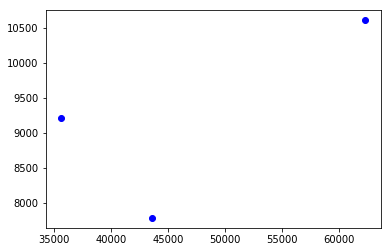

In [27]:
plt.plot(stats.length, stats.unique, "bo");

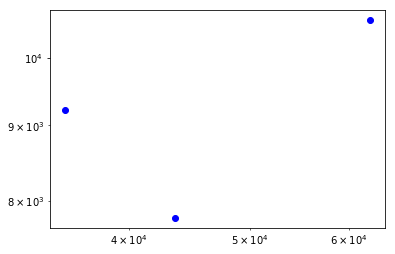

In [28]:
plt.loglog(stats.length, stats.unique, "bo");

In [29]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Stanley c. johnson,The Flags of our Fighting Army,43546,7789
2,English,Stanley c. johnson,Chats on Military Curios,62287,10609


In [30]:
stats[stats.language == "French"]

,language,author,title,length,unique
3,French,Voltaire,Candide,35593,9214


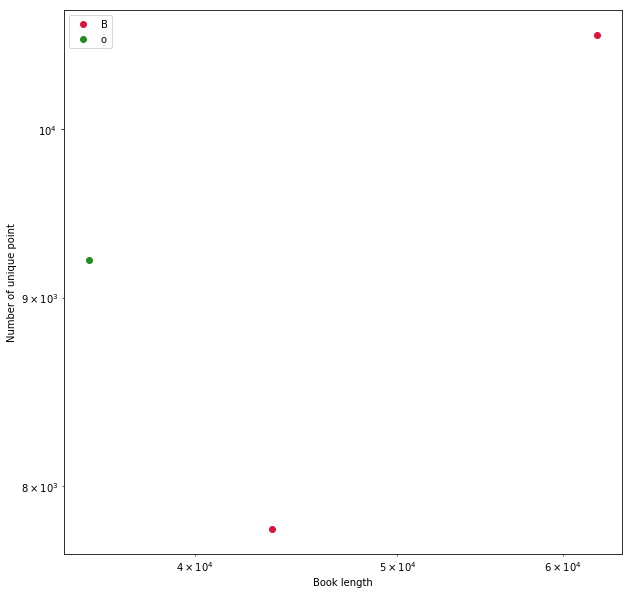

In [31]:
plt.figure(figsize=(10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson");
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen");
plt.legend("Book length")
plt.xlabel("Book length")
plt.ylabel("Number of unique point")
plt.savefig("lang_plot.pdf")